## 1. The Lists of Data Table
### 1) Case Data
**Case**: Data of COVID-19 infection cases in South Korea<br/>
### 2) Patient Data
**PatientInfo**: Epidemiological data of COVID-19 patients in South Korea<br/>
**PatientRoute**: Route data of COVID-19 patients in South Korea (currently unavailable)<br/>
### 3) Time Series Data
**Time**: Time series data of COVID-19 status in South Korea<br/>
**TimeAge**: Time series data of COVID-19 status in terms of the age in South Korea<br/>
**TimeGender**: Time series data of COVID-19 status in terms of gender in South Korea<br/>
**TimeProvince**: Time series data of COVID-19 status in terms of the Province in South Korea<br/>
### 4) Additional Data
**Region**: Location and statistical data of the regions in South Korea<br/>
**Weather**: Data of the weather in the regions of South Korea<br/>
**SearchTrend**: Trend data of the keywords searched in NAVER which is one of the largest portals in South Korea<br/>
**SeoulFloating**: Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub)<br/>
**Policy**: Data of the government policy for COVID-19 in South Korea<br/>
## 2. The Structure of our Dataset
What color means is that they have similar properties.<br/>
If a line is connected between columns, it means that the values of the columns are partially shared.<br/>
The dotted lines mean weak relevance.<br/>
<img src="covid-er-diagram.png" alt="Entity Relationship" title="Entity Relationship" />

In [25]:
!pip install folium

     |████████████████████████████████| 95 kB 13.4 MB/s eta 0:00:01


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import folium
from folium import plugins

In [29]:
#load_data
df_case = pd.read_csv("Case.csv");
df_patient = pd.read_csv("PatientInfo.csv");
df_patient_route = pd.read_csv("PatientRoute.csv");
df_region = pd.read_csv("Region.csv");
df_seoul = pd.read_csv("SeoulFloating.csv");
df_time = pd.read_csv("Time.csv");
df_timeage = pd.read_csv("TimeAge.csv");
df_timegender = pd.read_csv("TimeGender.csv");
df_timeprovince = pd.read_csv("TimeProvince.csv");

df_search = pd.read_csv("SearchTrend.csv");
df_policy = pd.read_csv("Policy.csv");
df_weather = pd.read_csv("Weather.csv");

In [4]:
display(df_case.head())
display(df_patient.head())
display(df_patient_route.head())

case_id province          city  group               infection_case  \
0   1000001    Seoul    Yongsan-gu   True                Itaewon Clubs   
1   1000002    Seoul     Gwanak-gu   True                      Richway   
2   1000003    Seoul       Guro-gu   True          Guro-gu Call Center   
3   1000004    Seoul  Yangcheon-gu   True  Yangcheon Table Tennis Club   
4   1000005    Seoul     Dobong-gu   True              Day Care Center   

   confirmed   latitude   longitude  
0        139  37.538621  126.992652  
1        119   37.48208  126.901384  
2         95  37.508163  126.884387  
3         43  37.546061  126.874209  
4         43  37.679422  127.044374

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

patient_id  global_num        date     province      city   latitude  \
0  1400000001           1  2020-01-19      Incheon   Jung-gu  37.460459   
1  1400000001           1  2020-01-20      Incheon    Seo-gu  37.478832   
2  1000000001           2  2020-01-22  Gyeonggi-do  Gimpo-si  37.562143   
3  1000000001           2  2020-01-23        Seoul   Jung-gu  37.567454   
4  2000000001           3  2020-01-20      Incheon   Jung-gu  37.460459   

    longitude  
0  126.440680  
1  126.668558  
2  126.801884  
3  127.005627  
4  126.440680

## Identify the infection_cases and provinces that has the highest confirmed cases.

In [30]:
#identify the infection_cases and provinces that has the highest confirmed cases. 

#  what percentage of confirmed people were contracted by group or not.
total_confirmed = df_case['confirmed'].sum()
print('total confirmed:', total_confirmed)
print(df_case.groupby('group')['confirmed'].apply(lambda x: "{:.2%}".format(x.sum()/total_confirmed)))

# 68.90% are contracted through group,  31.10% are not.

total confirmed: 11395
group
False    31.10%
True     68.90%
Name: confirmed, dtype: object


In [6]:
# confirmed cases percentage for each province
df_province_confirmed_pct =df_case.groupby('province')['confirmed'].apply(lambda x: x.sum()/total_confirmed).sort_values(ascending=False).apply(lambda x: "{:.2%}".format(x))
print(df_province_confirmed_pct)

#The top 4 provinces have 90% of the confirmed cases

province
Daegu                58.62%
Gyeongsangbuk-do     11.62%
Seoul                11.23%
Gyeonggi-do           8.78%
Incheon               1.77%
Chungcheongnam-do     1.39%
Busan                 1.37%
Gyeongsangnam-do      1.16%
Daejeon               1.15%
Gangwon-do            0.54%
Chungcheongbuk-do     0.53%
Ulsan                 0.45%
Sejong                0.43%
Gwangju               0.38%
Jeollanam-do          0.22%
Jeollabuk-do          0.20%
Jeju-do               0.17%
Name: confirmed, dtype: object


In [7]:
#top infection case which has the most confirmed cases
infection_case_top10 = df_case.groupby('infection_case')['confirmed'].sum().sort_values(ascending=False)[:10]
print(infection_case_top10)

#df_case[df_case['infection_case']=='Shincheonji Church']

infection_case
Shincheonji Church                 5213
contact with patient               1403
etc                                1192
overseas inflow                     949
Itaewon Clubs                       271
Second Mi-Ju Hospital               196
Richway                             184
Guro-gu Call Center                 167
Coupang Logistics Center            134
Hansarang Convalescent Hospital     124
Name: confirmed, dtype: int64


[Text(0.5, 0, 'Infection Cases'), Text(0, 0.5, 'Confirmed')]

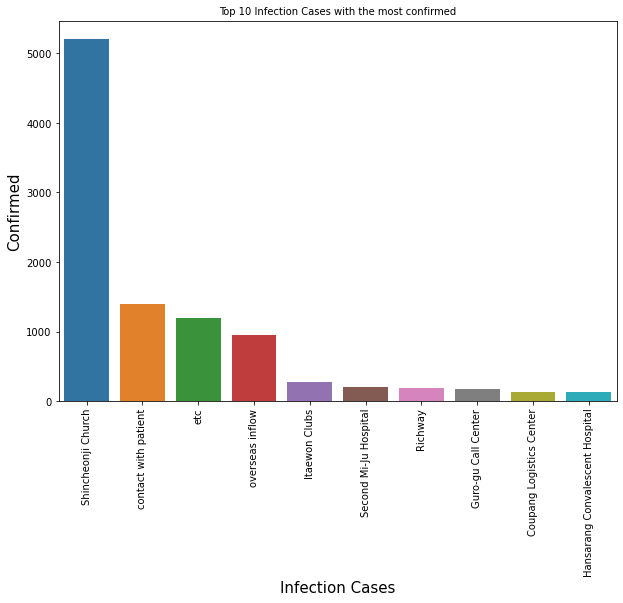

In [40]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
#plt.xticks(fontsize =15)
#plt.yticks(fontsize=15)
plt.xlabel('Infection Cases' ,fontsize = 15)
plt.ylabel('Confirmed' ,fontsize = 15)
plt.title('Top 10 Infection Cases with the most confirmed' ,fontsize=10)

ax = sns.barplot(x=infection_case_top10.index, y = infection_case_top10.values)
ax.set(xlabel='Infection Cases',ylabel='Confirmed')

In [10]:
#top infection case and province
infection_case_province=df_case.groupby(['infection_case', 'province'])['confirmed'].sum().sort_values(ascending=False)[:10]
print(infection_case_province)

infection_case         province        
Shincheonji Church     Daegu               4511
contact with patient   Daegu                917
etc                    Daegu                747
Shincheonji Church     Gyeongsangbuk-do     566
overseas inflow        Gyeonggi-do          305
                       Seoul                298
Second Mi-Ju Hospital  Daegu                196
contact with patient   Gyeongsangbuk-do     190
                       Seoul                162
Itaewon Clubs          Seoul                139
Name: confirmed, dtype: int64


In [77]:
# 174 rows in df_case, 53 (1/3) rows  are empty
print(df_case[df_case['city']=='-'].shape)
print(df_case.shape)
display(df_case[(df_case['province']=='Daegu') & (df_case['infection_case']=='Shincheonji Church')])

(53, 8)
(174, 8)


case_id province    city  group      infection_case  confirmed  latitude  \
48   1200001    Daegu  Nam-gu   True  Shincheonji Church       4511  35.84008   

   longitude  
48  128.5667

array([ 50,  30,  20,  60,  80,  70,  40,  10,  90,   0, -10, 100])

Text(0.5, 0, 'Age range')

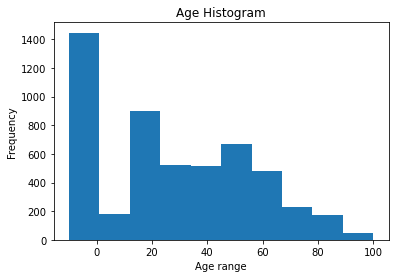

In [45]:
df_patient['age']= df_patient['age'].fillna('-10s')
df_patient['age_numeric'] = df_patient['age'].str[:-1].astype(int)
display(df_patient['age_numeric'].unique())
df_patient['age_numeric'].plot.hist()
plt.title("Age Histogram")
plt.xlabel("Age range")

## Data Clean
### Detect outlier 
patientinfo table column contact_number

patientinfo counts: 5165
NaN counts: 4374
- counts: 4
(787, 15)


<AxesSubplot:xlabel='contact_number', ylabel='Density'>

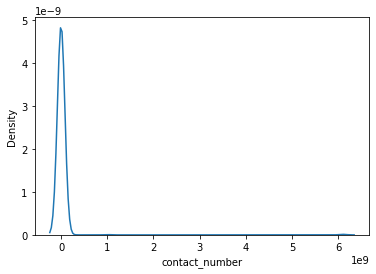

In [47]:
print('patientinfo counts:', df_patient.shape[0])
print('NaN counts:', df_patient[df_patient['contact_number'].isna()].shape[0])
print('- counts:', df_patient[df_patient['contact_number']=='-'].shape[0])
df_contact_number_clean = df_patient[(df_patient['contact_number']!='-') & (~df_patient['contact_number'].isna())]
df_contact_number_clean['contact_number'] = df_contact_number_clean['contact_number'].astype(int)
print(df_contact_number_clean.shape)
sns.kdeplot(df_contact_number_clean['contact_number'])

### Remove outliers using IQR (Interquartile Range)

In [50]:
contact_number_series = df_contact_number_clean['contact_number']
contact_number_series = contact_number_series.sort_values(ascending=False)
print(contact_number_series[:10])
Q1 = contact_number_series.quantile(0.25)
Q3 = contact_number_series.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(contact_number_series.shape)

5110    6100000099
5109    6100000098
818     1000000796
1463          1160
1312          1091
1318           485
1600           450
2215           422
1323           296
2218           290
Name: contact_number, dtype: int64
12.0
(787,)


outliers of contact_number series:
 5110    6100000099
5109    6100000098
818     1000000796
1463          1160
1312          1091
           ...    
1326            34
2037            34
3647            34
3733            34
3633            33
Name: contact_number, Length: 77, dtype: int64


<AxesSubplot:xlabel='contact_number', ylabel='Density'>

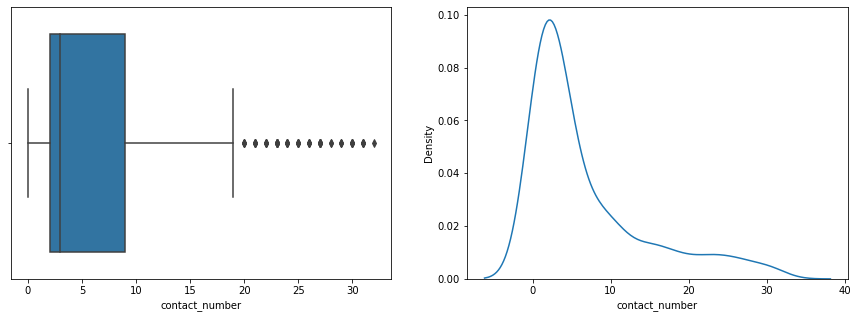

In [16]:
contact_number_outlier = contact_number_series[(contact_number_series < (Q1 - 1.5 * IQR)) | (contact_number_series > (Q3 + 1.5 * IQR))]
print('outliers of contact_number series:\n', contact_number_outlier)

#clean series after outliers are removed.
contact_number_series_clean = contact_number_series[~((contact_number_series < (Q1 - 1.5 * IQR)) |(contact_number_series > (Q3 + 1.5 * IQR)))]
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x=contact_number_series_clean, ax=axs[0])
sns.kdeplot(contact_number_series_clean, ax=axs[1])

### detect and remove outliers using z-score

(array([ 38, 769, 770]),)
818     1000000796
5109    6100000098
5110    6100000099
Name: contact_number, dtype: int64


<AxesSubplot:xlabel='contact_number', ylabel='Density'>

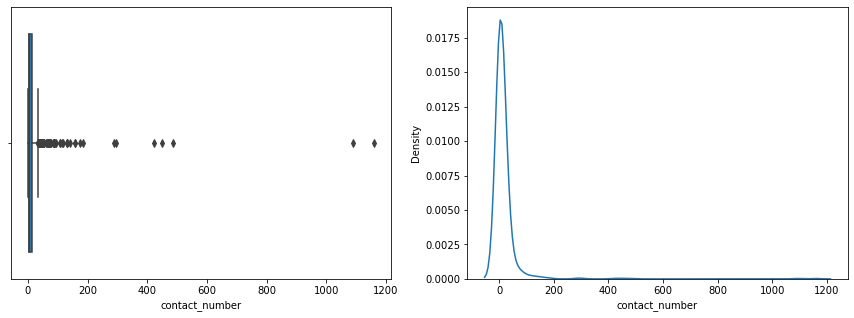

In [18]:
#use z-score to detect outlier, z = (x-μ)/σ,
from scipy import stats

z = np.abs(stats.zscore(df_contact_number_clean['contact_number']))
threshold = 1
print(np.where(z > threshold))
print(df_contact_number_clean['contact_number'].iloc[list(np.where(z > threshold)[0])])

clean_index_list = list(np.where(z < threshold)[0])
contact_number_series_clean = df_contact_number_clean['contact_number'].iloc[clean_index_list]
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x=contact_number_series_clean, ax=axs[0])
sns.kdeplot(contact_number_series_clean, ax=axs[1])

## Correlation 
### TimeAge table,  variables: age and confirmed 

In [20]:
#Compute pairwise correlation of columns, excluding NA/null values
display(df_timeage.head(5))
df_timeage['age_numeric'] = df_timeage['age'].str[:-1].astype(int)
df_timeage_pearson = df_timeage.corr(method='pearson')
print(df_timeage_pearson)

date  time  age  confirmed  deceased  age_numeric
0  2020-03-02     0   0s         32         0            0
1  2020-03-02     0  10s        169         0           10
2  2020-03-02     0  20s       1235         0           20
3  2020-03-02     0  30s        506         1           30
4  2020-03-02     0  40s        633         1           40

             time  confirmed  deceased  age_numeric
time          NaN        NaN       NaN          NaN
confirmed     NaN   1.000000 -0.277291    -0.039002
deceased      NaN  -0.277291  1.000000     0.762953
age_numeric   NaN  -0.039002  0.762953     1.000000


<AxesSubplot:>

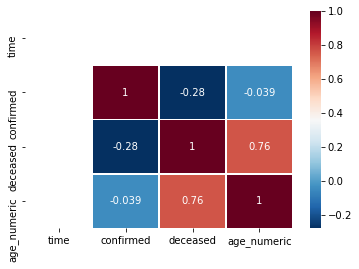

In [21]:
sns.heatmap(df_timeage_pearson, cmap='RdBu_r', annot=True, linewidth=0.5)

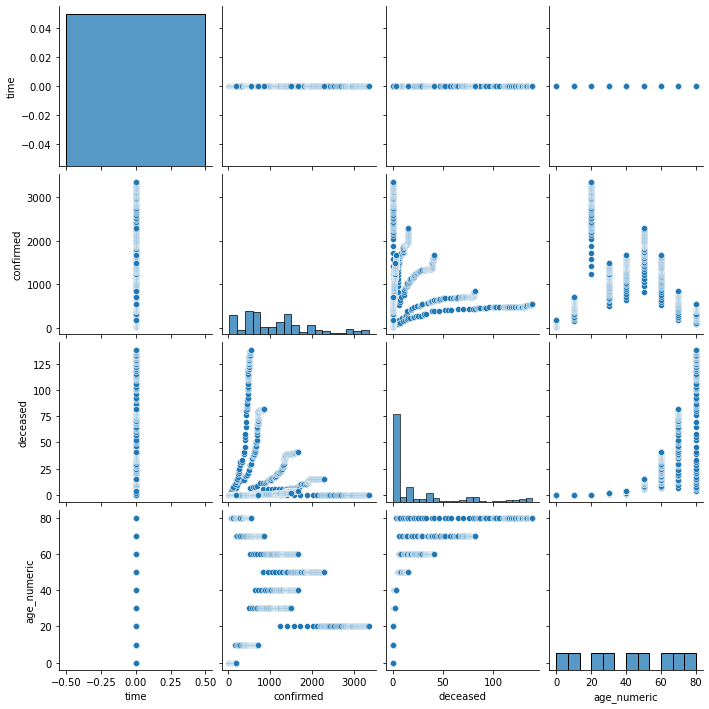

In [28]:
sns.pairplot(df_timeage)

In [22]:
from scipy.stats import pearsonr

# calculate Pearson's correlation between age and deceased number
corr, _ = pearsonr(df_timeage["age_numeric"], df_timeage["deceased"])
print(corr)

0.7629532434194071


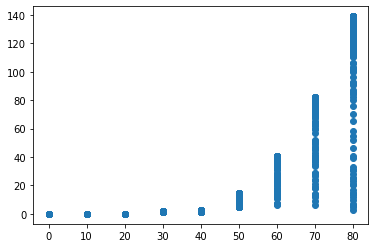

In [23]:
plt.scatter(df_timeage['age_numeric'],df_timeage['deceased'])

array([ 50,  30,  20,  60,  80,  70,  40,  10,  90,   0, -10, 100])

<AxesSubplot:title={'center':'age wise state frequency'}, xlabel='age_numeric', ylabel='count'>

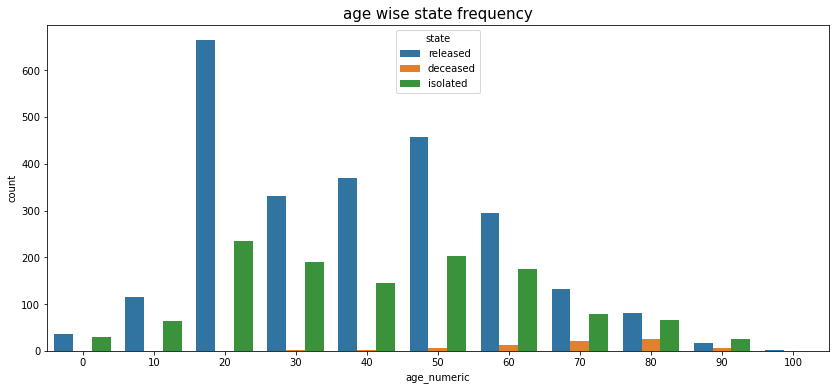

In [74]:
plt.figure(figsize=(14,6))
df_patient_age =  df_patient[df_patient['age_numeric']>=0]
plt.title('age wise state frequency',fontsize = 15)
sns.countplot(x='age_numeric', hue='state',data=df_patient_age)

### Time Series for SearchTrend

In [29]:
#resample the time series to be weekly data
display(df_search.head())
datetime = pd.to_datetime(df_search['date'])
df_search['datetime'] = datetime
df_search_week = df_search.resample('W', on='datetime').sum().reset_index()
df_search_week.head()


date     cold      flu  pneumonia  coronavirus
0  2016-01-01  0.11663  0.05590    0.15726      0.00736
1  2016-01-02  0.13372  0.17135    0.20826      0.00890
2  2016-01-03  0.14917  0.22317    0.19326      0.00845
3  2016-01-04  0.17463  0.18626    0.29008      0.01145
4  2016-01-05  0.17226  0.15072    0.24562      0.01381

datetime     cold      flu  pneumonia  coronavirus
0 2016-01-03  0.39952  0.45042    0.55878      0.02471
1 2016-01-10  1.14684  1.16256    1.78328      0.08404
2 2016-01-17  1.16038  2.33399    1.47764      0.07668
3 2016-01-24  1.16540  1.74582    1.28212      0.07715
4 2016-01-31  1.52647  2.48762    1.30229      0.07941

datetime   variable    value
354 2018-04-08        flu  0.50222
573 2017-12-10  pneumonia  1.14975
698 2020-05-03  pneumonia  0.61359
537 2017-04-02  pneumonia  1.44064
235 2020-07-05       cold  0.14263

<AxesSubplot:xlabel='datetime', ylabel='value'>

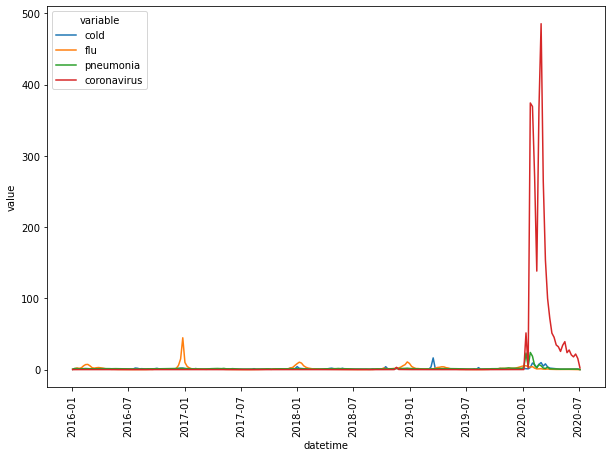

In [43]:
# melt the table 
df_search_week_melt = df_search_week.melt(id_vars=["datetime"])
display(df_search_week_melt.sample(5))
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.lineplot(x='datetime', y='value', hue='variable', data=df_search_week_melt)

### Autocorrelation of time series data

Text(0, 0.5, 'Normalized correlation')

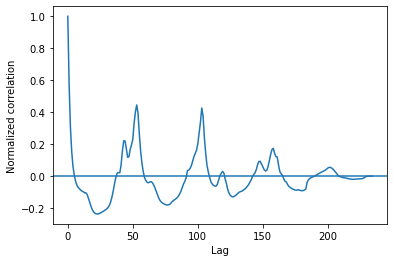

In [46]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

x_flu = df_search_week['flu'] - df_search_week['flu'].mean()
autocorr_flu = np.correlate(x_flu, x_flu, mode='full')
autocorr_flu = autocorr_flu[x_flu.size:]
autocorr_flu /= autocorr_flu.max()

plt.plot(autocorr_flu)
# And we'll add a reference line at 0
plt.axhline()
# And let's toss in some labels
plt.xlabel("Lag")
plt.ylabel("Normalized correlation")


(0.0, 156.0)

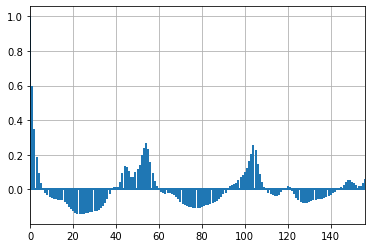

In [49]:
plt.gca().acorr(x_flu, usevlines=True, maxlags=156, normed=True, lw=2);
plt.gca().grid(True)
plt.gca().set_xlim(0, 156)

(0.0, 104.0)

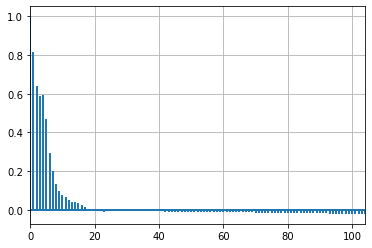

In [51]:
x_coronavirus = df_search_week['coronavirus'] - df_search_week['coronavirus'].mean()
plt.gca().acorr(x_coronavirus, usevlines=True, maxlags=104, normed=True, lw=2);
plt.gca().grid(True)
plt.gca().set_xlim(0, 104)

In [31]:
df_case_map = df_case[(~df_case['latitude'].str.contains('-')) & (~df_case['longitude'].str.contains('-'))]

m = folium.Map(location = [37.538621,126.992652], tiles = 'Stamen Terrain', zoom_start =7)

for idx, row in df_case_map.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['confirmed']).add_to(m)
    
m

In [53]:
datetime_df_time = pd.to_datetime(df_time['date'])
df_time['datetime'] = datetime_df_time
df_time=df_time.sort_values(by=['datetime'])

df_time_search = pd.merge(df_time, df_search , how="left", on=["datetime"])
df_time_search.head(5)

date_x  time  test  negative  confirmed  released  deceased   datetime  \
0  2020-01-20    16     1         0          1         0         0 2020-01-20   
1  2020-01-21    16     1         0          1         0         0 2020-01-21   
2  2020-01-22    16     4         3          1         0         0 2020-01-22   
3  2020-01-23    16    22        21          1         0         0 2020-01-23   
4  2020-01-24    16    27        25          2         0         0 2020-01-24   

       date_y     cold      flu  pneumonia  coronavirus  
0  2020-01-20  0.19217  0.70343    3.63716     20.69610  
1  2020-01-21  0.22462  0.59789    4.31987     35.33284  
2  2020-01-22  0.23808  0.56661    3.66416     29.74474  
3  2020-01-23  0.30308  0.55625    3.18035    100.00000  
4  2020-01-24  0.34689  0.40226    2.48156     86.11541

Text(0.5, 1.0, 'Test and coronavirus search')

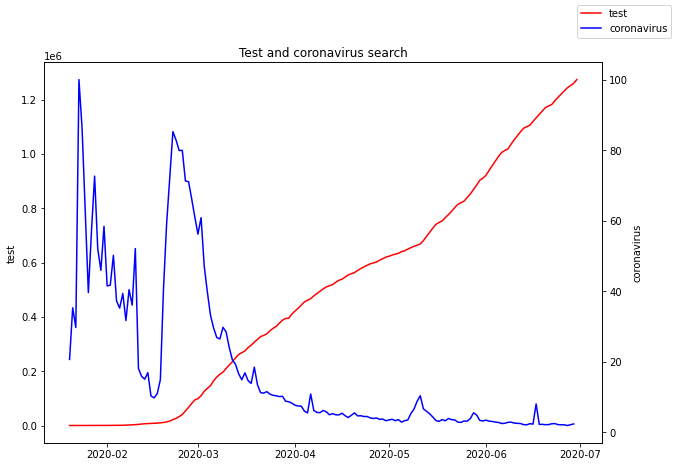

In [60]:
plt.figure(figsize=(10,7))
plt.plot(df_time_search["datetime"], df_time_search["test"],'r-', label="test")
plt.gca().twinx()
plt.plot(df_time_search["datetime"], df_time_search["coronavirus"],'b-', label="coronavirus")

# Now let's put a little labeling on the plot
plt.gcf().legend(loc="upper right")
plt.gcf().axes[0].set_ylabel("test")
plt.gcf().axes[1].set_ylabel("coronavirus")
plt.title("Test and coronavirus search")

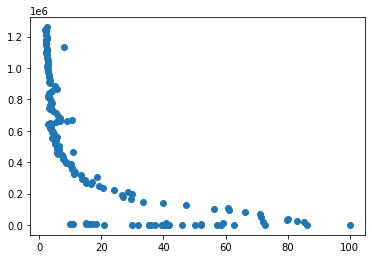

In [61]:
plt.scatter(df_time_search["coronavirus"], df_time_search["test"])

In [65]:
corr, _ = pearsonr(df_time_search["coronavirus"].fillna(0), df_time_search["test"].fillna(0))
print(corr)

-0.7162876771826713


<AxesSubplot:xlabel='deceased', ylabel='confirmed'>

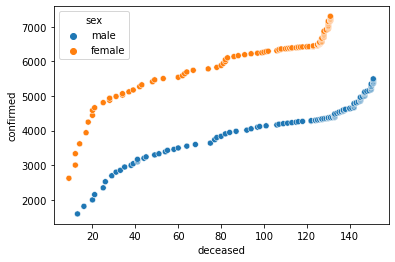

In [78]:
sns.scatterplot('deceased', 'confirmed', data = df_timegender, hue = 'sex')

### Folium MarkerCluster : Lets see the number of regional confirmed patient

In [32]:
regional_patient = pd.merge(df_patient[['patient_id','confirmed_date','sex','age','province','city']],df_region[['province','city','latitude','longitude']], how = 'left', on = ['province','city'])
display(regional_patient.head())
regional_count = regional_patient[['latitude','longitude']].dropna() # drop missing values
display(regional_count.head())

patient_id confirmed_date     sex  age province         city   latitude  \
0  1000000001     2020-01-23    male  50s    Seoul   Gangseo-gu  37.551166   
1  1000000002     2020-01-30    male  30s    Seoul  Jungnang-gu  37.606832   
2  1000000003     2020-01-30    male  50s    Seoul    Jongno-gu  37.572999   
3  1000000004     2020-01-30    male  20s    Seoul      Mapo-gu  37.566283   
4  1000000005     2020-01-31  female  20s    Seoul  Seongbuk-gu  37.589562   

    longitude  
0  126.849506  
1  127.092656  
2  126.979189  
3  126.901644  
4  127.016700

latitude   longitude
0  37.551166  126.849506
1  37.606832  127.092656
2  37.572999  126.979189
3  37.566283  126.901644
4  37.589562  127.016700

In [33]:
m = folium.Map([36, 128], zoom_start=7)

plugins.MousePosition().add_to(m) 

plugins.MarkerCluster(regional_count).add_to(m)

m

### Make subgroups to plot : Female / Male

In [34]:
male_patient = regional_patient\
.query('sex in ("male")')[['latitude','longitude']].dropna()

female_patient = regional_patient\
.query('sex in ("female")')[['latitude','longitude']].dropna()


m = folium.Map([36, 128], zoom_start=7) 

initial = folium.plugins.MarkerCluster(control=False)

m.add_child(initial)


female_g = plugins.FeatureGroupSubGroup(initial, 'Female')
m.add_child(female_g)

male_g = plugins.FeatureGroupSubGroup(initial, 'Male') 
m.add_child(male_g)


plugins.MarkerCluster(female_patient).add_to(female_g)

plugins.MarkerCluster(male_patient).add_to(male_g)



folium.LayerControl(collapsed=False).add_to(m)
m

### Make a Heat map : Instead of the number

In [35]:
heat_data = regional_patient.groupby(['latitude','longitude'])['patient_id'].count().reset_index().values.tolist()
heat_data[:2]

[[33.488936, 126.500423, 18.0], [34.760421, 127.662287, 3.0]]

In [36]:
m = folium.Map([36, 128], zoom_start=7)#, tiles = 'stamentoner')

folium.plugins.HeatMap(heat_data).add_to(m)

m

### Additional try : MarkCluster Layer On the Heatmap Layer

In [37]:
heat_data = df_region[['latitude','longitude','nursing_home_count']].values.tolist() # nursing home count 

mark_data = regional_patient[['latitude','longitude']].dropna() # drop missing values

m = folium.Map([36, 128], zoom_start=7)

plugins.MarkerCluster(mark_data).add_to(m) # Layer 1

folium.plugins.HeatMap(heat_data, max_opacity = 0.3).add_to(m) # Layer 2

m

### Heatmap with time : time series heat map

In [38]:
regional_patient_bytime = regional_patient\
.groupby(['confirmed_date','latitude','longitude'])['patient_id'].count().reset_index()\
.sort_values(by = 'confirmed_date')

date_rng = pd.date_range(regional_patient_bytime['confirmed_date'].min(), regional_patient_bytime['confirmed_date'].max())
date_rng = [str(i)[:10] for i in date_rng]

all_date_region = pd.DataFrame({'confirmed_date' : np.repeat(date_rng,df_region[['latitude','longitude']].drop_duplicates().shape[0]),
              'latitude' : np.tile(list(df_region['latitude'].drop_duplicates()), len(date_rng)),
              'longitude' : np.tile(list(df_region['longitude'].drop_duplicates()), len(date_rng))})

all_date_region = pd.merge(all_date_region, regional_patient_bytime, on = ['confirmed_date','latitude','longitude'], how = 'left').fillna(0)
all_date_region['cumsum'] = all_date_region.groupby(['latitude','longitude'])['patient_id'].cumsum()

all_date_region = all_date_region[all_date_region['cumsum'] != 0]

time_index, data = [], []

for date in all_date_region['confirmed_date'].unique():
    time_index += [date[6:].replace('-','/')]
    temp_list = all_date_region.query('confirmed_date == @date')[['latitude','longitude','cumsum']].values.tolist()
    data += [temp_list]
    del temp_list

In [39]:
#HeatMapWithTime needs this type of input 
data[:5], time_index[:5]

([[[37.551166, 126.849506, 1.0]],
  [[37.551166, 126.849506, 1.0]],
  [[37.551166, 126.849506, 1.0]],
  [[37.551166, 126.849506, 1.0], [37.658363, 126.831961, 1.0]],
  [[37.551166, 126.849506, 1.0],
   [37.658363, 126.831961, 1.0],
   [36.992293, 127.112709, 1.0]]],
 ['1/23', '1/24', '1/25', '1/26', '1/27'])

In [40]:
m = folium.Map([36, 128], zoom_start=7)#, tiles = 'Mapbox Bright')

hm = folium.plugins.HeatMapWithTime(data, index=time_index, auto_play=False, min_opacity=0.3, radius = 25, )

hm.add_to(m)

for bottom, click in zip([60,90,120,150,180],['Loop','Forward','Play','Reverse','Backward']):
    
    # Thank you for html code. https://www.kaggle.com/poonsfc5/ds4c-covid-19-in-korea-eda-with-geo-data
    name = '''
            <div style="position: fixed; bottom: '''+str(bottom)+'''px; left: 50px; width: 100px; height: 29px; 
                        background-color: white; border:1px solid grey; z-index:9999; font-size:11px;text-align:center;"
                        >&nbsp; <br><b>Click : '''+ click +'''</b></div>'''  

    m.get_root().html.add_child(folium.Element(name))

m

### Make Circles with timebar : Timestamped Geojson

In [41]:
# prepare data
df_dropna = regional_patient.dropna()
df_dropna['timestamp'] = [i+'T00:00:00' for i in df_dropna['confirmed_date']]

points = []
for date in sorted(df_dropna['confirmed_date'].unique()):
    temp = df_dropna.query('confirmed_date == @date')
    
    temp_dict = {}
    temp_dict['coordinates'] = temp[['longitude','latitude']].values.tolist()
    temp_dict['dates'] = temp['timestamp'].values.tolist()
    
    points += [temp_dict]

features = [ { 'type': 'Feature', 
                  'geometry': { 'type': 'MultiPoint', 
                               'coordinates': point['coordinates'], }, 
                  'properties': { 'times': point['dates'],
                                 'icon' : 'circle'}
             } for point in points ] 

In [42]:
#TimestampedGeoJson needs this type of input data.
features[:3]

[{'type': 'Feature',
  'geometry': {'type': 'MultiPoint', 'coordinates': [[126.849506, 37.551166]]},
  'properties': {'times': ['2020-01-23T00:00:00'], 'icon': 'circle'}},
 {'type': 'Feature',
  'geometry': {'type': 'MultiPoint', 'coordinates': [[126.831961, 37.658363]]},
  'properties': {'times': ['2020-01-26T00:00:00'], 'icon': 'circle'}},
 {'type': 'Feature',
  'geometry': {'type': 'MultiPoint', 'coordinates': [[127.112709, 36.992293]]},
  'properties': {'times': ['2020-01-27T00:00:00'], 'icon': 'circle'}}]

In [43]:
m = folium.Map( location=[36, 128], zoom_start=7 )

plugins.TimestampedGeoJson({ 
    'type': 'FeatureCollection', 
    'features': features, 
}, period='P1D', auto_play = False).add_to(m)

m